# 3.0 Introduction

#### Outline
1. Population and Sample
   * Introduce random sampling and sample


2. Variation of Sample 样本方差
   * Understand Distribution of Sample Mean


3. Confidence Interval置信区间
   * How to estimate using confidene interval


4. Hypothesis Testing
   * Validate Claims using Hypothesis Testing

## 3.1 Populcation and sample

**What is Poplulation?**
* All registered voters in Thailand
* All Hong Kong citizens who played golf at least once past year
* All neurons in your brain

**Sample**
* Small group of members of a poplulation selected to represent to the population

* Must be randomly selected 

Two Kinds of Sampling

**1. Sampling without replacement**
  * A populcation individual can be selected only one time
  * Without putting it back to population
  
**2. Sampling with replacement**
  * A randomly selected individual will be put back before the next one being selected
  * A population element can be selected more than one time

In [109]:
import pandas as pd
import numpy as np
from scipy.stats import norm
%matplotlib inline

In [2]:
data=pd.DataFrame()
data['Population']=[47,48,85,20,19,13,72,16,50,60]

In [3]:
# Here False means without replacement
a_sample_without_replacement=data['Population'].sample(5,replace=False)
a_sample_without_replacement

1    48
6    72
0    47
9    60
7    16
Name: Population, dtype: int64

In [4]:
# Here False means with replacement
a_sample_with_replacement=data['Population'].sample(5,replace=True)
a_sample_with_replacement

3    20
8    50
0    47
4    19
6    72
Name: Population, dtype: int64

Parameters| Statistics
---:|---:
Mean| Sample mean
Variance| Sample Variance
Standard deviation| Sample Standard deviation

### Population

In [5]:
print('Population mean is', data['Population'].mean())
print('Population variance is', data['Population'].var(ddof=0))
print('Population Standard deviation is', data['Population'].std(ddof=0))
print('Population size is', data['Population'].shape[0])

Population mean is 43.0
Population variance is 571.8
Population Standard deviation is 23.912339910598458
Population size is 10


### Sample

In [6]:
a_sample=data['Population'].sample(10, replace=True)

In [7]:
print('Sample mean is', a_sample.mean())
print('Sample variance is', a_sample.var(ddof=1))
print('Sample Standard deviation  is', a_sample.std(ddof=1))
print('Sample size is', a_sample.shape[0])


Sample mean is 43.3
Sample variance is 725.788888888889
Sample Standard deviation  is 26.94046935168148
Sample size is 10


In [8]:
sample_length = 500
sample_variance_collection0=[data['Population'].sample(50,
                                                      replace=True).var(ddof=0)
                            for i in range(sample_length)]

sample_variance_collection1=[data['Population'].sample(50,
                                                      replace=True).var(ddof=1)
                            for i in range(sample_length)]

In [9]:
print('Population variance is', data['Population'].var(ddof=0))

print('Average of sample variance with n is',
     pd.DataFrame(sample_variance_collection0)[0].mean())

print('Average of sample variance with n-1 is',
     pd.DataFrame(sample_variance_collection1)[0].mean())

Population variance is 571.8
Average of sample variance with n is 559.5282871999997
Average of sample variance with n-1 is 575.4308367346935


**On average, the average of estimator using division n-1 equals population variance**

### Degrees of Freedom

**The number of values in calculation that are free to variate**

# Exercise

In [10]:
# Calculate sample mean and sample standard deviation, size =10
# You will get different mean and varince every time when you excecute the below code

a_sample = data['Population'].sample(10, replace=True)
sample_mean = a_sample.mean()
sample_var = a_sample.var()
print('Sample mean is ', sample_mean)
print('Sample variance is', sample_var)

Sample mean is  34.3
Sample variance is 434.0111111111112


#### Average of an unbiased estimator

In [11]:
sample_length = 500
sample_variance_collection=[data['Population'].sample(10, replace=True).var(ddof=1) for i in range(sample_length)]

## 3.2 Variation of Sample 样品的变化

#### Sample from normal distribution

In [12]:
Fstsample= pd.DataFrame(np.random.normal(10,5,size=30))

print('Sample mean is', Fstsample[0].mean())
print('Sample SD is', Fstsample[0].std(ddof=1))

Sample mean is 9.942139297241825
Sample SD is 5.327235982935497


**The results are almost different because the sample is random selected everytime runing**

### Empirical distribution 经验分布 of sample mean and variance

### What if the population is not normal?

Central limit theorem 中心极限定理

  * If the sample size is larger enough, the distribution of sample mean is approximately normal 如果样本量足够大，则样本均值的分布大致正常

### Sampling from general distribution

In [13]:
meanlist=[]
varlist=[]
for t in range(1000):
    sample=pd.DataFrame(np.random.normal(10,5,size=30))
    meanlist.append(sample[0].mean())
    varlist.append(sample[0].var(ddof=1))

collection=pd.DataFrame()
collection['meanlist']=meanlist
collection['varlist']=varlist

C:\Users\Elva\Anaconda3\lib\site-packages\pandas\plotting\_core.py:2477: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  ax.hist(values, bins=bins, **kwds)


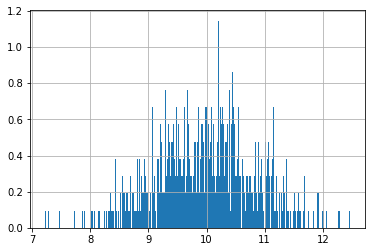

In [14]:
collection['meanlist'].hist(bins=500, normed=1)

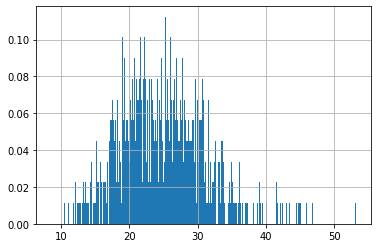

In [15]:
collection['varlist'].hist(bins=500, normed=1)

**Comparing above two charts, we can mathematically prove that the sample mean has a normal distribution**

<img src="https://raw.githubusercontent.com/elva4012/Python-and-Statistics-for-Financial-Analysis/master/1.png" width=500>

#### Demo in python- Population vs Empirical

In [17]:
sample_size = 100
samplemeanlist =[]
apop= pd.DataFrame([1,0,1,0,1])
for t in range(10000):
    sample = apop[0].sample(100, replace=True) #small sample size
    samplemeanlist.append(sample.mean())

acollec= pd.DataFrame()
acollec['meanlist']=samplemeanlist

C:\Users\Elva\Anaconda3\lib\site-packages\pandas\plotting\_core.py:2410: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  ax.hist(data[col].dropna().values, bins=bins, **kwds)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002B6DB047358>]],
      dtype=object)

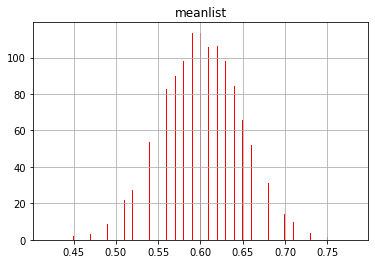

In [18]:
acollec.hist(bins=500, color='red', normed=1)

## Exercise

In [19]:
meanlist = []
for t in range(10000):
    sample = pd.DataFrame(np.random.normal(10, 5, size=30))
    meanlist.append(sample[0].mean())

In [20]:
collection = pd.DataFrame()
collection['meanlist'] = meanlist

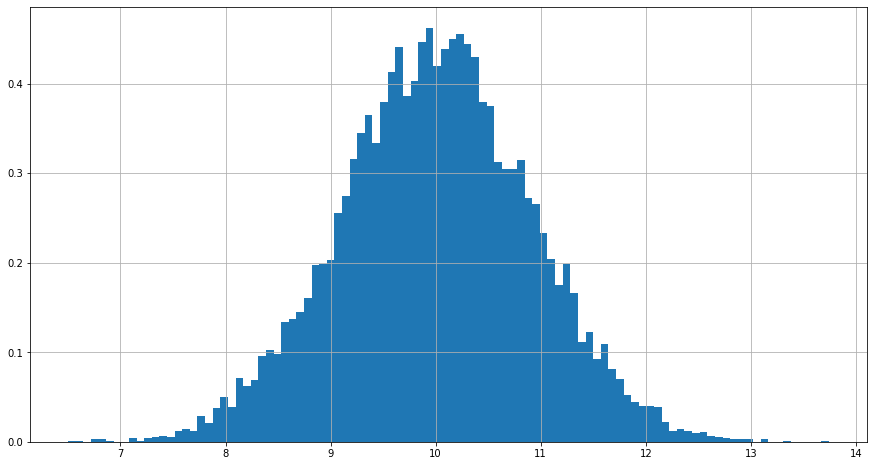

In [21]:
collection['meanlist'].hist(bins=100, normed=1,figsize=(15,8))

#### Sampling from arbritary distribution

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002B6DB0470B8>]],
      dtype=object)

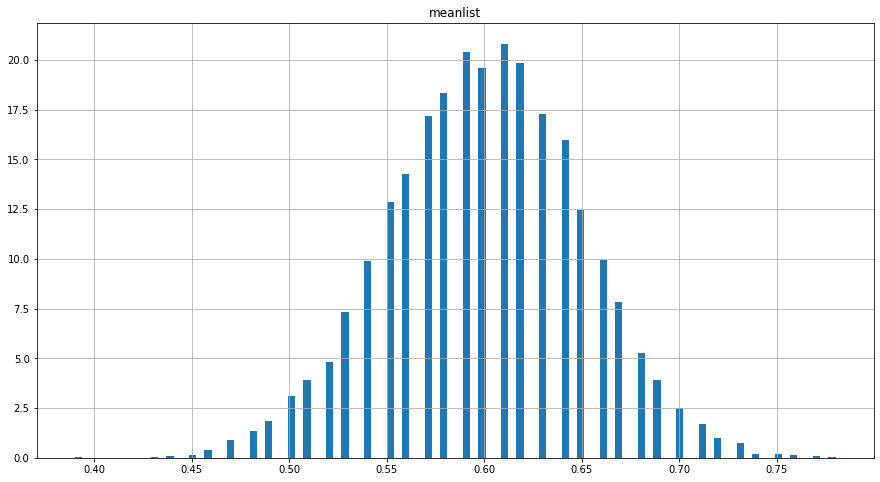

In [22]:
# See what central limit theorem tells you...the sample size is larger enough, 
# the distribution of sample mean is approximately normal
# apop is not normal, but try to change the sample size from 100 to a larger number. The distribution of sample mean of apop 
# becomes normal.
sample_size = 100
samplemeanlist = []
apop =  pd.DataFrame([1, 0, 1, 0, 1])
for t in range(10000):
    sample = apop[0].sample(sample_size, replace=True)  # small sample size
    samplemeanlist.append(sample.mean())

acollec = pd.DataFrame()
acollec['meanlist'] = samplemeanlist
acollec.hist(bins=100, normed=1,figsize=(15,8))

## 3.3 Confidence Interval

### Sample log return of Apple Stock

In [23]:
aapl=pd.DataFrame.from_csv(r'C:\Users\Elva\Downloads\AAPL.csv')

C:\Users\Elva\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  """Entry point for launching an IPython kernel.


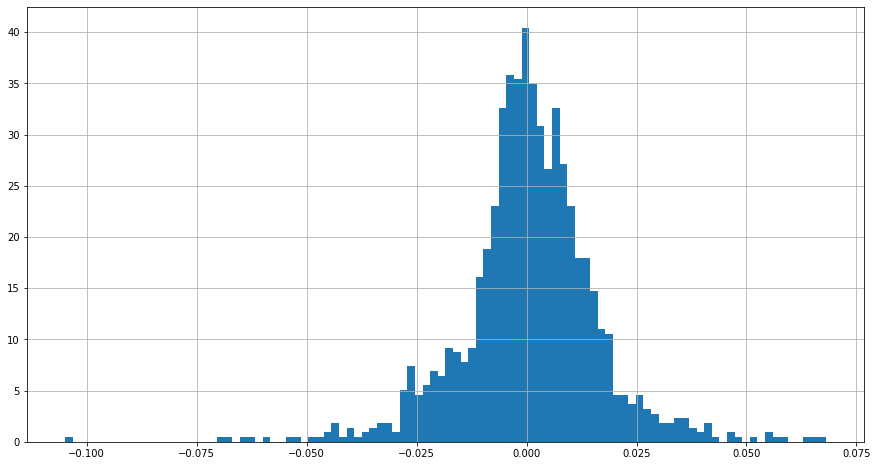

In [24]:
aapl['logReturn']=np.log(aapl['Close'].shift(-1))-np.log(aapl['Close'])

aapl['logReturn'].hist(bins=100, normed=1,figsize=(15,8))

If a sample is a good representative of the population, the population mean should be close to sample mean. It is plausible to say that the population mean is in a range with sample mean centered.
<img src="https://raw.githubusercontent.com/elva4012/Python-and-Statistics-for-Financial-Analysis/master/2.png" width=300>


The task in this video is to estimate population mean using interval with lower and upper bound.
<img src="https://raw.githubusercontent.com/elva4012/Python-and-Statistics-for-Financial-Analysis/master/3.png" width=300>

we need to standardize sample mean because different sample has different mean and a standard deviation
<img src="https://raw.githubusercontent.com/elva4012/Python-and-Statistics-for-Financial-Analysis/master/4.png" width=300>


We can standardize sample mean by minus it's mean, which is identical to population mean and then divided by its standard deviation, which is the standard deviation of population divided by square root of sample size. 
<img src="https://raw.githubusercontent.com/elva4012/Python-and-Statistics-for-Financial-Analysis/master/5.png"  width=300>

After standardization, it'll become standard normal, and follows Z-distribution.

<img src="https://raw.githubusercontent.com/elva4012/Python-and-Statistics-for-Financial-Analysis/master/6.png" width=300>

For Z-distribution, it is not difficult to find the two quantities; Z Alpha over two, and Z, one minus Alpha over two such that in the middle, the probability is one minus Alpha. We have Z_1 minus Alpha over two equal to negative Z Alpha over two. 


<img src="https://raw.githubusercontent.com/elva4012/Python-and-Statistics-for-Financial-Analysis/master/7.png" width=300>

Since the standardization form of sample mean is also Z, then we have this equation.

With some calculation in the parenthesis, we can have this form, which explicitly gives the upper and lower bounds for population mean. Notice that Sigma is the population standard deviation, which is usually unknown.
<img src="https://raw.githubusercontent.com/elva4012/Python-and-Statistics-for-Financial-Analysis/master/9.png" width=300>

The interval here, for Mu is called confidence interval at the level of one minus Alpha
<img src="https://raw.githubusercontent.com/elva4012/Python-and-Statistics-for-Financial-Analysis/master/10.png" width=300>

In [27]:
aapl['logReturn']=np.log(aapl['Close'].shift(-1))-np.log(aapl['Close'])

In [45]:
# Calues for calculating the 80% confidence interval
z_left=norm.ppf(0.2)
z_right=norm.ppf(0.8)
sample_mean=aapl['logReturn'].mean()
sample_std = aapl['logReturn'].std(ddof=1)/(aapl.shape[0])**0.5

In [46]:
interval_left=sample_mean+z_left*sample_std
interval_right=sample_mean+z_right*sample_std
print("Sample mean is", sample_mean)
print("*******************************************")
print("80% confidence interval are", 
      "interval_left = ", interval_left, "and", 
      "interval_right =", interval_right)

Sample mean is 0.0005927329309565019
*******************************************
80% confidence interval are interval_left =  0.00022398835954511563 and interval_right = 0.0009614775023678883


* Average return of Apple stocks falls in this interval with 80 percent chance

* Notice: this interval is on the **positive** side. it implies that the average return is very like to be positive. 

# Exercise

In [40]:
import pandas as pd
import numpy as np
from scipy.stats import norm

In [41]:
ms = pd.DataFrame.from_csv(r'C:\Users\Elva\Downloads\MSFT.csv')
ms.head()

C:\Users\Elva\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  """Entry point for launching an IPython kernel.


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-07-14,42.220001,42.450001,42.040001,42.139999,37.613037,21881100
2014-07-15,42.330002,42.470001,42.029999,42.450001,37.889740,28748700
2014-07-16,42.509998,44.310001,42.480000,44.080002,39.344639,63318000
2014-07-17,45.450001,45.709999,44.250000,44.529999,39.746288,82180300
2014-07-18,44.650002,44.840000,44.250000,44.689999,39.889099,43407500


### Estimate the average stock return with 90% Confidence Interval

In [42]:
# we will use log return for average stock return of Microsoft

ms['logReturn'] = np.log(ms['Close'].shift(-1)) - np.log(ms['Close'])

In [47]:
# Lets build 90% confidence interval for log return
sample_size = ms['logReturn'].shape[0]
sample_mean = ms['logReturn'].mean()
sample_std = ms['logReturn'].std(ddof=1) / sample_size**0.5

# left and right quantile
z_left=norm.ppf(0.1)
z_right=norm.ppf(0.9)

# upper and lower bound
interval_left=sample_mean+z_left*sample_std
interval_right=sample_mean+z_right*sample_std

In [48]:
# 90% confidence interval tells you that there will be 90% chance that the average stock return lies between "interval_left"
# and "interval_right".

print('90% confidence interval is ', (interval_left, interval_right))

90% confidence interval is  (0.0004171593212627399, 0.0014791154353638622)


## 3.4.Hypothesis Testing

Validate Claims using hypothesis

Hypothesis testing can use sample information to test the validity of conjectures 猜想的有效性 about these parameters.

In many situations, we need to demonstrate validity 证明有效性 of assertions. For example, you are a venture capitalist 风险投资家 and is proposed a project running 36 months.

With 36 months data at hand, should you invest in this project? Suppose you will invest if average monthly profit is over 20,000. This question is not to ask you to estimate some parameters. Instead, you need to make a judgement whether the condition is satisfied. We need a new statistic tool, hypothesis testing.


In [66]:
from matplotlib import pyplot as plt

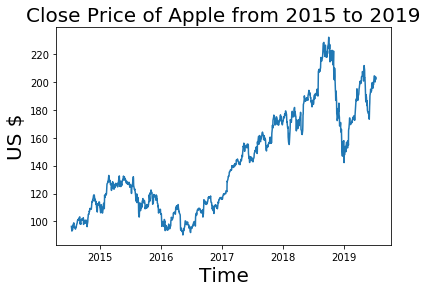

In [67]:
plt.title("Close Price of Apple from 2015 to 2019", size=20)
plt.xlabel("Time", size=20)
plt.ylabel("US $", size=20)
plt.plot(aapl.loc[:,'Close'])

This is a daily close price of Apple from 2007 to 2018. It looks like the price is in an upward trend and we may guess the average of daily return is positive. However, if we plot the daily return directly, the daily return goes positive, negative. And our assertion that the average of daily return is positive is not obvious.

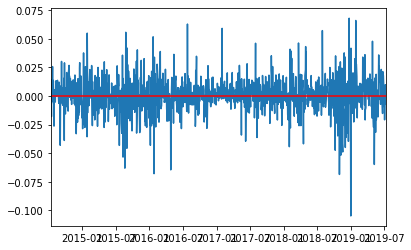

In [68]:
plt.xlim(aapl.index[0],aapl.index[-1])
plt.plot(aapl.loc[:,'logReturn'])
plt.axhline(0,color='red')

It is also not obvious whether the average of daily return is 0 or not. In the histogram daily return, it is approximately symmetric 近似对称 above 0. It is still not obvious whether the average daily return is different from 0. We want to use a quantitative statistical tool to make judgement about the assertion 断言 that the average daily return is not 0.

### Setting hypothesis

* Null hypothesis 零假设 (the null is population mean, the average daily return is 0.)
* Alternative hypothesis替代假设 (average daily return is not equal to 0)

So, given that the null is correct, the difference between sample statistic, x-bar, and the population parameter mu cannot be very large. If it's significantly large, the null should be incorrect, and we should accept alternative.

To measure the magnitude 大小 of difference, we also need to consider the standard deviation of the sample, because the sample with a large standard deviation usually its size is larger, here we need to do standardization标准化.


<img src="https://raw.githubusercontent.com/elva4012/Pictures/master/11.png" width=300>

**Null is not likely to be true.**
* If we know population standard deviation, the standardized sample mean we denote as z-hat, and the z-distribution, 
* If population is normal, or it's sample size large.
* If a z-hat is far away from 0, 



<img src="https://raw.githubusercontent.com/elva4012/Pictures/master/12.png" width=300>

In hypothesis testing, we start with assumption that the null is correct. Hence, we know population mean is equal to 0. But in most situations, population standard deviation is not known. Then we can replace population standard deviation with the sample standard deviation. Then this new term denoted as t-hat, has a new distribution, t-distribution.

Similar to z-distribution, t is a symmetric with respect to 0 and a bell-shaped. The difference lies in the tail. T-distribution had flat tails which implies t has a higher chance to take the values in the two tails

<img src="https://raw.githubusercontent.com/elva4012/Pictures/master/13.png" width=300>

The t-distribution is a dependent on the degree of freedom. In our example, the degree of freedom is equal to the degree of freedom of the sample standard deviation, which is n-1. As the sample size increases, the degree of freedom increases, and the t is more and more like z-distribution. So with a large sample, we can treat t as if it is a z-distribution.

#### Standardization

In [73]:
# X-bar is sample mean, average daily return. S is sample standard deviation, 
# n is a sample size.
xbar= aapl['logReturn'].mean()
s=aapl['logReturn'].std(ddof=1)
n=aapl['logReturn'].shape[0]
zhat=(xbar-0)/(s/(n**0.5))
print(zhat)

1.3528514294366536


Z-hat equal to **1.353** It's a standardized statistics. We use mu equal to 0 because we assume the null is correct at the beginning

If z-hat is different from 0 significantly, we can infer that this sample is not sampled for the population with mean equal to 0. Then, we can reject the null

**How do we find the significance level?**
<img src="https://raw.githubusercontent.com/elva4012/Pictures/master/14.png" width=300>

We use the probability on the two tails of a z-distribution. we fixed the significance level, for example, alpha equal to 5%, which is the probability for z to take the values of some demands of the two tails? We can see that these two demands is z less than -1.96 and z bigger 1.96.

-1.96 and positive 1.96 are 2.5% and 97.5% quantiles of z. These two demands are called rejection regions and this kind of test is called **two-tailed test.**

If statistic z-hat falls into rejection region, we can tell that statistics is far away from 0, significantly and then we can reject the null. Here, we should notice that z-hat is also possible to take values in rejection region even if the null is correct, and the mu equal to 0. This chance is equal to alpha 5%. In other words, we have a 5% chance to reject null wrongly. This is called a type 1 error, and the probability of a type 1 error is identical to the level of significance level.

If a significance level is small, the probability of a type 1 error is smaller.

### Set Decision Criteria

In [76]:
alpha=0.05
zleft=norm.ppf(alpha/2,0,1)
zright=-zleft
print(zleft,zright)
print('At the significance level of', alpha)
print('Shall we reject?:', zhat>zright or zhat<zleft)

-1.9599639845400545 1.9599639845400545
At the significance level of 0.05
Shall we reject?: False


we demonstrate how to get the quantiles which is also called critical values. Alpha equal to 5% is a given hence, norm.ppf can be applied to get the quantiles. In the print, we use a bold number to generate whether to reject or not directly.

we will reject null hypothesis and the average daily return is not equal to 0. Our conclusion may be wrong but it happens only with 5% probability. We may want to further demonstrate that the average return is in fact positive. We need another kind of test, **one-tail test.**

<img src="https://raw.githubusercontent.com/elva4012/Pictures/master/15.png" width=300>

In one tail test, the null is the average daily return is less than or equal to 0, which we are against. The alternative hypothesis, the average daily return is positive. 


<img src="https://raw.githubusercontent.com/elva4012/Pictures/master/16.png" width=300>

First, we take a mu equal to 0. We still need to standardize sample mean, which is average daily return in the sample.

If z-hat is significantly large, which implies that sample mean is a positive comparing to mu equal to 0. Hence, it is not likely to be sampled from population, which may equal to 0. It is also not likely to be sampled from population with negative mu.

Similarly, we fix significance level alpha, and identify rejection region using z-distribution, which is z-hat is larger than z-alpha.

### Set Decision Criteria of One Tail Test

In [77]:
alpha=0.05
zright=norm.ppf(1- alpha,0,1)

print(zleft,zright)
print('At the significance level of', alpha)
print('Shall we reject?:', zhat>zright)

-1.9599639845400545 1.6448536269514722
At the significance level of 0.05
Shall we reject?: False


We can show that the null is rejected under 5% It means that the average daily return of a population is indeed positive. we do need a quantitative statistic tool to validate our assertion in addition to visualize the data.

<img src="https://raw.githubusercontent.com/elva4012/Pictures/master/17.png" width=300>

For population mean, we have these three kinds of hypothesis in the regression criteria. For different kinds of hypothesis, the criterion is different.

A more popular way of testing is to compute p-value. We know that given that null is correct, standardized sample mean follows z-distribution.


**What is the probability for this distribution to take a more extreme value than our observation in given sample?**
<img src="https://raw.githubusercontent.com/elva4012/Pictures/master/18.png" width=300>

This is a p-value, if p is less than alpha which is a threshold, it means that the null is unlikely to be true.With p-value, we only need to compare it with alpha although the way to compute p is different.


In [78]:
aplha=0.05
p=1-(norm.cdf(abs(zhat),0,1))
print('At the significance level of ', alpha)
print('Shall we reject:', p<alpha)

At the significance level of  0.05
Shall we reject: False


Here's a demonstration of p-value approach, in two-tailed test, abs is to compute the absolute value. We use norm.cdf to compute cumulative probability.

# Exercise-Hypothesis testing

In [79]:
import pandas as pd
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
% matplotlib inline

UsageError: Line magic function `%` not found.


In [85]:
# import microsoft.csv, and add a new feature - logreturn
wbs = pd.DataFrame.from_csv(r'C:\Users\Elva\Downloads\WBS.csv')
wbs['logReturn'] = np.log(wbs['Close'].shift(-1)) - np.log(wbs['Close'])

C:\Users\Elva\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  


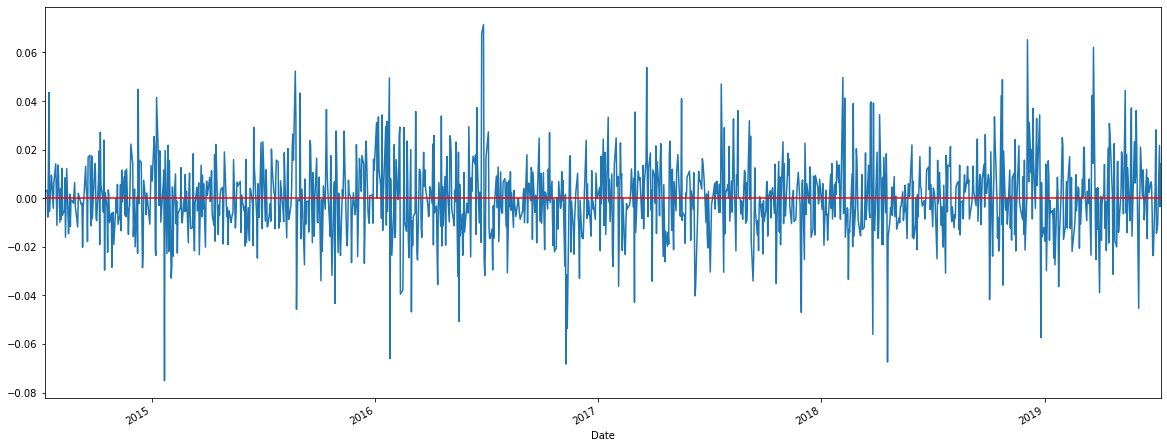

In [86]:
# Log return goes up and down during the period
wbs['logReturn'].plot(figsize=(20, 8))
plt.axhline(0, color='red')
plt.show()

### Steps involved in testing a claim by hypothesis testing

#### Step 1: Set hypothesis

$H_0 : \mu = 0$
$H_a : \mu \neq 0$

H0 means the average stock return is 0
H1 means the average stock return is not equal to 0

#### Step 2: Calculate test statistic

In [100]:
sample_mean = wbs['logReturn'].mean()
sample_std = wbs['logReturn'].std(ddof=1)
n = wbs['logReturn'].shape[0]

# if sample size n is large enough, we can use z-distribution, instead of t-distribtuion
# mu = 0 under the null hypothesis
zhat=(xbar-0)/(s/(n**0.5))
print(zhat)

1.3528514294366536


#### Step 3: Set desicion criteria

In [101]:
sample_mean = wbs['logReturn'].mean()
sample_std = wbs['logReturn'].std(ddof=1)
n = wbs['logReturn'].shape[0]

# if sample size n is large enough, we can use z-distribution, instead of t-distribtuion
# mu = 0 under the null hypothesis
zhat = (sample_mean - 0)/(sample_std/n**0.5)
print(zhat)

-0.6696267692801687


In [102]:
# confidence level
alpha = 0.05

zleft = norm.ppf(alpha/2, 0, 1)
zright = -zleft  # z-distribution is symmetric 
print(zleft, zright)

-1.9599639845400545 1.9599639845400545


#### Step 4: Make decision - shall we reject $H_0$?

In [103]:
print('At significant level of {}, shall we reject: {}'.format(alpha, zhat>zright or zhat<zleft))

At significant level of 0.05, shall we reject: False


## One tail test

**Step 1**

$H_0 : \mu \leq 0$ 
$H_a : \mu > 0$

#### step 2

In [99]:
sample_mean = wbs['logReturn'].mean()
sample_std = wbs['logReturn'].std(ddof=1)
n = wbs['logReturn'].shape[0]

# if sample size n is large enough, we can use z-distribution, instead of t-distribtuion
# mu = 0 under the null hypothesis
zhat = (sample_mean - 0)/(sample_std/n**0.5)

print(zhat)

-0.6696267692801687


#### Step 3

In [105]:
alpha = 0.05

zright = norm.ppf(1-alpha, 0, 1)
print(zright)

1.6448536269514722


In [106]:
# step 4
print('At significant level of {}, shall we reject: {}'.format(alpha, zhat>zright))

At significant level of 0.05, shall we reject: False


### An alternative method: p-value

In [107]:
# step 4
print('At significant level of {}, shall we reject: {}'.format(alpha, p < alpha))# step 4

0.7484521275404294


In [108]:
print('At significant level of {}, shall we reject: {}'.format(alpha, p < alpha))

At significant level of 0.05, shall we reject: False
